In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

ERROR: Could not install packages due to an OSError: [WinError 5] Acesso negado: 'c:\\programdata\\anaconda3\\lib\\site-packages\\scikit_learn-0.24.1.dist-info\\COPYING'
Consider using the `--user` option or check the permissions.




  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:


In [4]:
url = 'C:/Users/juan_/Documents/GitHub/Datasets/teleCust1000t.csv'

In [5]:
df = pd.read_csv(url)

In [6]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [18]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

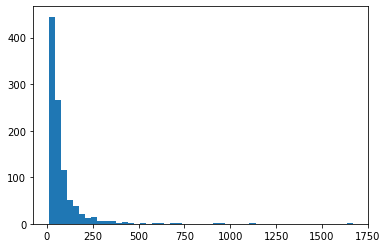

In [38]:
plt.hist(df['income'],bins=50)
plt.show()

In [39]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [74]:
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed','employ', 'retire', 'gender', 'reside',]].values
y = df['custcat'].values

In [58]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [59]:
X

array([[-0.02696767, -1.055125  ,  0.18450456, ..., -0.22207644,
        -1.03459817, -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243, ..., -0.22207644,
        -1.03459817,  2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601, ..., -0.22207644,
         0.96655883, -0.23065004],
       ...,
       [ 1.19883553,  1.47425216,  1.37948227, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  1.61477311,  0.58283046, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  0.67796676, -0.45281689, ..., -0.22207644,
         0.96655883,  0.46617787]])

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [77]:
print('Train set:', X_train.shape, y_train.shape)
print('Test set:',X_test.shape, y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [82]:
yhat = neigh.predict(X_test)

In [83]:
from sklearn import metrics
print('Train set Accuracy: ', metrics.accuracy_score(y_train, neigh.predict(X_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.53
Test set Accuracy:  0.345


In [86]:
k6 = 6
neigh6 = KNeighborsClassifier(n_neighbors = k6).fit(X_train, y_train)
neigh6

KNeighborsClassifier(n_neighbors=6)

In [87]:
yhat6 = neigh6.predict(X_test)

In [88]:
print('Train set Accuracy: ', metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.50125
Test set Accuracy:  0.345


In [91]:
Ks = 10
mean_acc1 = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.325, 0.335, 0.32 , 0.345, 0.295, 0.335, 0.315, 0.335, 0.34 ])

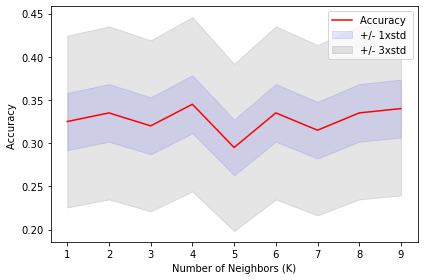

In [102]:
plt.plot(range(1,Ks),mean_acc,'r')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10, color='blue')
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="black")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [94]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.345 with k= 4
